**Load data**

In [ ]:
import gdown
from pathlib import Path 

In [ ]:
true_file_url = "https://drive.google.com/file/d/1sUCKf3XrvdGXm2gQ51uMnQgpzQCYyt9D/view?usp=sharing"

In [ ]:
true_file_id = '1sUCKf3XrvdGXm2gQ51uMnQgpzQCYyt9D'
true_destination = Path('artifacts\data\true.csv')  

In [ ]:


# Replace 'your-file-id' with the actual file ID from the Google Drive shareable link


gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)


In [ ]:
import pandas as pd

In [ ]:
true_df = pd.read_csv('True.csv',encoding='ISO-8859-1',on_bad_lines='skip',engine='python')

In [ ]:
fake_df = pd.read_csv('Fake.csv',encoding='ISO-8859-1',on_bad_lines='skip',engine='python')

In [ ]:
fake_df['label'] = 1
true_df['label'] = 0

In [ ]:
df = pd.concat([true_df,fake_df],ignore_index=True)

In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [ ]:
df.shape

(44897, 5)

In [ ]:
df.describe(include='all')

,title,text,subject,date,label
count,44897,44897,44897,44897,44897.000000
unique,38728,38645,8,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,14,627,11271,182,NaN
mean,NaN,NaN,NaN,NaN,0.522997
std,NaN,NaN,NaN,NaN,0.499476
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


**Missing Value Handeling**

In [ ]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


**Text Preprocessing**

In [ ]:
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    text = word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

In [ ]:
clean_text(df['text'][1])

'washington reuters transgender people allowed first time enlist u military starting monday ordered federal court pentagon said friday president donald trump administration decided appeal ruling blocked transgender ban two federal appeal court one washington one virginia last week rejected administration request put hold order lower court judge requiring military begin accepting transgender recruit jan 1 justice department official said administration challenge ruling department defense announced releasing independent study issue coming week rather litigate interim appeal occurs administration decided wait dod study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior official study implement directive trump prohibit transgender individual serving defense department feb 21 submit plan trump lawyer representing currently serving transgender service member aspiring recruit said expected 

In [ ]:
true_df2 = true_df[['text','label']][:1000]
fake_df2 = fake_df[['text','label']][:1000]

In [ ]:
df = pd.concat([true_df2,fake_df2],ignore_index=True)

In [ ]:
df.shape

(2000, 2)

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

**EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

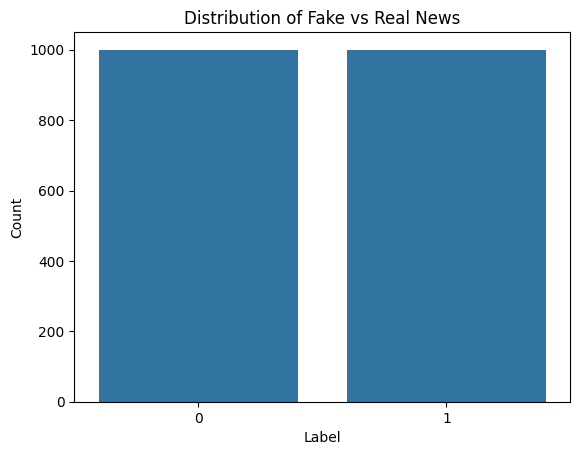

In [ ]:
sns.countplot(x='label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Fake vs Real News')
plt.show()

**Text Vectorization**

In [ ]:
final = df[['clean_text','label']]

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize
import numpy as np

In [ ]:
words = []

for sentence in final['clean_text']:
    words.append(word_tokenize(sentence))

In [ ]:
model = gensim.models.Word2Vec(words,min_count=1,vector_size=300,window=5,epochs=10)

In [ ]:
print("VOC Size :",len(model.wv.index_to_key))

VOC Size : 24616


In [ ]:
print("Corpus Size :",model.corpus_count)

Corpus Size : 2000


In [ ]:
model.wv.most_similar('trump')

[('bewilderment', 0.7517877221107483),
 ('resurfacing', 0.7333138585090637),
 ('rankle', 0.7080676555633545),
 ('contributes', 0.6663614511489868),
 ('assortment', 0.6451172232627869),
 ('frantic', 0.6351990103721619),
 ('crestfallen', 0.6335228681564331),
 ('peculiar', 0.6328276991844177),
 ('saga', 0.6249517798423767),
 ('president', 0.6235342621803284)]

In [ ]:
model.wv['trump'].shape

(300,)

In [ ]:
def AvgWord2Vec(docs):
  return np.mean([model.wv[word] for word in docs if word in model.wv],axis=0)

In [ ]:
df['clean_text'][0]

'washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase non defense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration already willing say going increase non defense discretionary spending 7 percent meadow chairman small influential house freedom caucus said program democrat saying enough need give

In [ ]:
AvgWord2Vec(final['clean_text'][0])

array([-3.99506241e-02,  6.22557942e-03, -3.35889496e-02,  9.14445892e-02,
        2.26260766e-01, -2.94916958e-01,  1.93178415e-01,  3.06768835e-01,
        1.50851548e-01, -1.12830058e-01, -9.23019350e-02, -6.66990429e-02,
       -1.25687599e-01, -1.03201739e-01, -1.81936681e-01, -5.75750321e-02,
       -2.16437340e-01, -1.49357796e-01,  2.98576981e-01, -2.91167051e-01,
       -7.90321156e-02,  6.34215325e-02,  2.71120667e-01, -1.25070617e-01,
        3.70319992e-01,  7.77472742e-03, -7.26823136e-02, -1.45023048e-01,
       -2.67612636e-01,  4.88390587e-02,  1.99166700e-01, -1.04707345e-01,
       -1.12775922e-01,  1.83218986e-01, -1.24819987e-01,  1.02510862e-01,
       -6.37246370e-02, -3.63997132e-01, -5.68401739e-02, -1.46413878e-01,
       -1.05283812e-01,  1.44820511e-01,  2.64751375e-01, -5.39429188e-01,
        7.46735856e-02,  3.52822155e-01,  5.83943129e-02,  6.44970834e-02,
       -1.18128911e-01,  3.82210463e-01, -5.81741147e-02, -2.52118334e-02,
       -1.12013519e-01,  

In [ ]:
df['vector'] = df['clean_text'].apply(AvgWord2Vec)

In [ ]:
df.head(1)

,text,label,clean_text,vector
0,WASHINGTON (Reuters) - The head of a conservat...,0,washington reuters head conservative republica...,"[-0.039950624, 0.0062255794, -0.03358895, 0.09..."


In [ ]:
df[['vector','label']].head(2)

,vector,label
0,"[-0.039950624, 0.0062255794, -0.03358895, 0.09...",0
1,"[-0.041062716, 0.0034036182, -0.04097341, 0.08...",0


**Model Buliding**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(np.stack(df['vector']),df['label'],test_size=0.2,random_state=42)

In [ ]:
def ModelBuilding(estimetor,x_train,x_test,y_train,y_test):
  model = estimetor()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  Accuracy_Score = accuracy_score(y_test,y_pred)
  Precision_Score = precision_score(y_test,y_pred)
  Recall_Score = recall_score(y_test,y_pred)
  F1_Score = f1_score(y_test,y_pred)
  return Accuracy_Score,Precision_Score,Recall_Score,F1_Score

In [ ]:
Accuracy_Score,Precision_Score,Recall_Score,F1_Score  = ModelBuilding(RandomForestClassifier,x_train,x_test,y_train,y_test)

In [ ]:
print("Estimetor :",'RandomForestClassifier')
print("Accuracy Score :",Accuracy_Score)
print("Precision Score :",Precision_Score)
print("Recall Score :",Recall_Score)
print("F1 Score :",F1_Score)

Estimetor : RandomForestClassifier
Accuracy Score : 0.765
Precision Score : 0.7661691542288557
Recall Score : 0.7661691542288557
F1 Score : 0.7661691542288557


In [ ]:
Accuracy_Score,Precision_Score,Recall_Score,F1_Score  = ModelBuilding(GradientBoostingClassifier,x_train,x_test,y_train,y_test)

In [ ]:
print("Estimetor :",'GradientBoostingClassifier')
print("Accuracy Score :",Accuracy_Score)
print("Precision Score :",Precision_Score)
print("Recall Score :",Recall_Score)
print("F1 Score :",F1_Score)

Estimetor : GradientBoostingClassifier
Accuracy Score : 0.77
Precision Score : 0.7823834196891192
Recall Score : 0.7512437810945274
F1 Score : 0.766497461928934


In [ ]:
Accuracy_Score,Precision_Score,Recall_Score,F1_Score  = ModelBuilding(AdaBoostClassifier,x_train,x_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
print("Estimetor :",'AdaBoostClassifier')
print("Accuracy Score :",Accuracy_Score)
print("Precision Score :",Precision_Score)
print("Recall Score :",Recall_Score)
print("F1 Score :",F1_Score)

Estimetor : AdaBoostClassifier
Accuracy Score : 0.7525
Precision Score : 0.7524752475247525
Recall Score : 0.7562189054726368
F1 Score : 0.7543424317617866
